**DSC Assignment**

Submitted by Binto B

IMS24069

In [76]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import modularity

#for karate club case
A = nx.to_numpy_array(nx.karate_club_graph(),dtype = int)
mod_value=0
communities = [{x for x in range(len(A[0]))}]
iterations = 0

The following block of code creates 4 dictionaries which stores the value of all the metrics with iteration number as a key and a list with metric value of all nodes as its value.

In [77]:
degree_centrality = {}
betweenness_centrality = {}
closeness_centrality = {}
clustering_coefficient = {}

def calculate_parameters():
    degree_centrality[iterations] = []
    betweenness_centrality[iterations] = []
    closeness_centrality[iterations] = []
    clustering_coefficient[iterations] = []

    for node in range(A.shape[0]):
        for comm in communities:
          if node in comm:
            subG = G.subgraph(list(comm)).copy()
            degree_centrality[iterations].append(nx.degree_centrality(subG)[node])
            betweenness_centrality[iterations].append(nx.betweenness_centrality(subG)[node])
            closeness_centrality[iterations].append(nx.closeness_centrality(subG)[node])
            clustering_coefficient[iterations].append(nx.clustering(subG)[node])
        continue

        degree_centrality[iterations].append(nx.degree_centrality(G)[node])
        betweenness_centrality[iterations].append(nx.betweenness_centrality(G)[node])
        closeness_centrality[iterations].append(nx.closeness_centrality(G)[node])
        clustering_coefficient[iterations].append(nx.clustering(G)[node])

The following code contains a function which allows us to add cluster into the list "communities" so that it can be used for marking each community in the graph.

Initially I make the B_c which is the modularity matrix for each new community created. Then, I create the sorted eigen value and eigen vector from which I get the eigen vector corresponding to the largest eigen vector. Then I create two empty list in which the node numbers will get added according to the community they belong.

The modularity objective, modularity matrix B, and spectral bipartition method are
based on standard results; see Newman (2006), “Modularity and community structure in
networks,” PNAS 103(23):8577–8582.

In [78]:
def clustering(cluster):
    global iterations
    global mod_value
    iterations+=1
    to_do_list.remove(cluster)
    communities.remove(set(cluster))
    subG_1 = G.subgraph(cluster)
    A_c=nx.to_numpy_array(subG_1)
    k= np.sum(A_c, axis=1)
    B_c= A_c - np.outer(k, k) / (2*k.sum())

    eigenvalues, eigenvectors = np.linalg.eigh(B_c)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    u1 = eigenvectors[:,0]

    if eigenvalues[0]>1e-3:
        cluster_1=[]
        cluster_2=[]

        for j in range(len(eigenvectors[0])):
            if u1[j]>0:
              cluster_1.append(cluster[j])
            else:
              cluster_2.append(cluster[j])
  #If there is a case in which the eigen value is +ve and all the values in
  #the corresponding vectors are either +ve/-ve then it comes inside this if
  #statement
        if cluster_1==[] or cluster_2==[]:
            communities.append(set(cluster))

#Checking whether the modularity of the graph really increases or not
#If not revert the changes made
            new_mod=modularity(G,communities)
            if mod_value>new_mod:
                communities.remove(set(cluster))
            else:
                mod_value=new_mod
##################################################################
            return False

        else:
            to_do_list.append(cluster_1)
            to_do_list.append(cluster_2)
            communities.append(set(cluster_1))
            communities.append(set(cluster_2))

#Checking whether the modularity of the graph really increases or not
#If not revert the changes made
            new_mod=modularity(G,communities)
            if mod_value>new_mod:
                communities.remove(set(cluster_1))
                communities.remove(set(cluster_2))
                to_do_list.remove(cluster_1)
                to_do_list.remove(cluster_2)
            else:
                mod_value=new_mod
#####################################################################
            return True

In [79]:
def plot(G):
    color_map = {}
    print('Iteration Number:', iterations)
    for i, comm in enumerate(communities):
        for node in comm:
            color_map[node] = i
    for i in range(node_count):
        if i not in color_map.keys():
            color_map[i] = node_count
    colors = [color_map[node] for node in G.nodes()]
    pos = nx.spring_layout(G, seed=4)
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.tab10)
    plt.show()

Iteration Number: 0


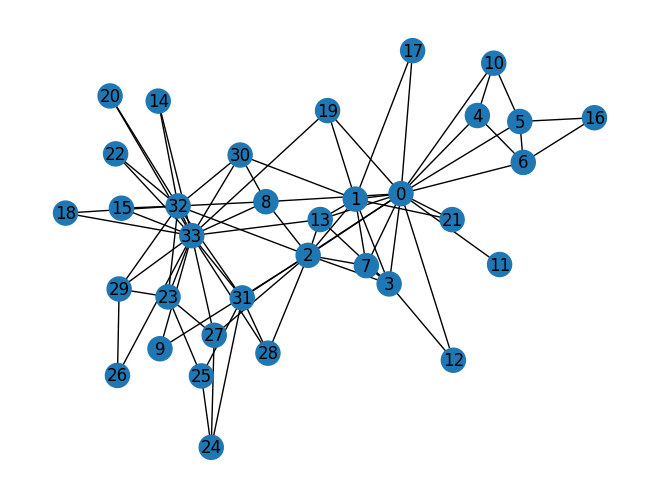

Iteration Number: 1


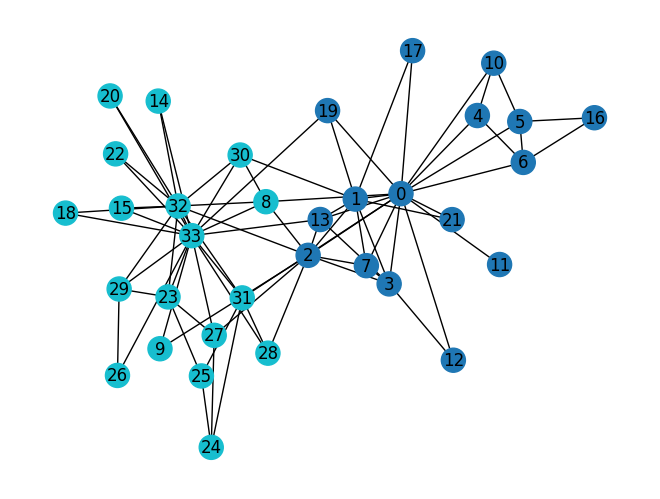

Iteration Number: 3


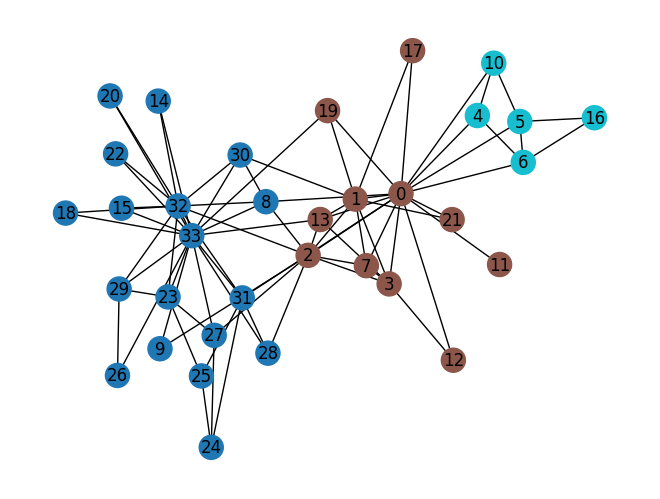

In [80]:
k = np.sum(A, axis=1)
edge_count = k.sum()/2
B = A - np.outer(k, k) / (2*edge_count)
node_count = A.shape[1]
G = nx.from_numpy_array(A)

plot(G)
calculate_parameters()

to_do_list = [list(range(node_count))]
while to_do_list != []:
  for i in to_do_list:
    if clustering(i):
      plot(G)
    calculate_parameters()


3 clusters were identified



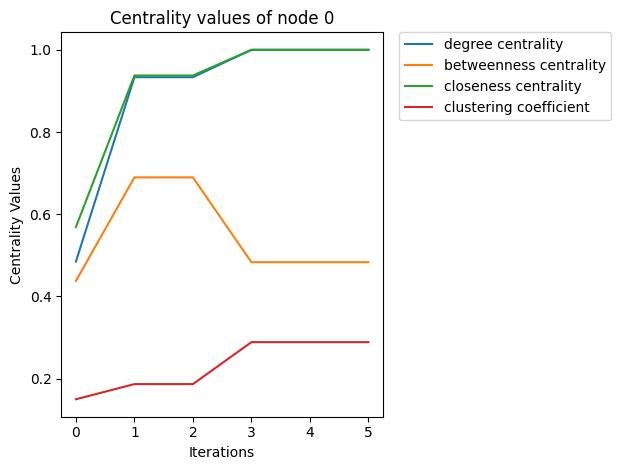

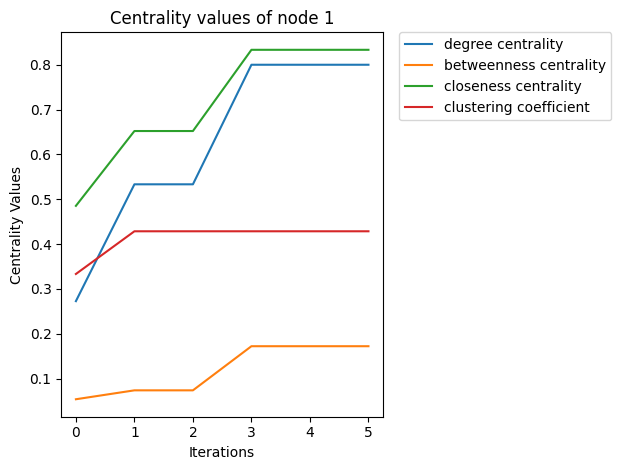

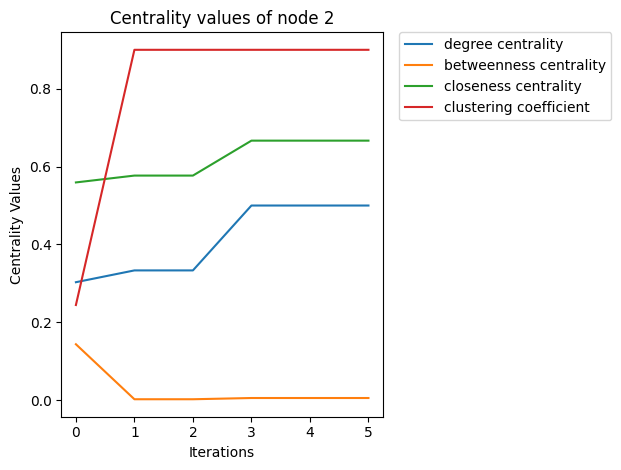

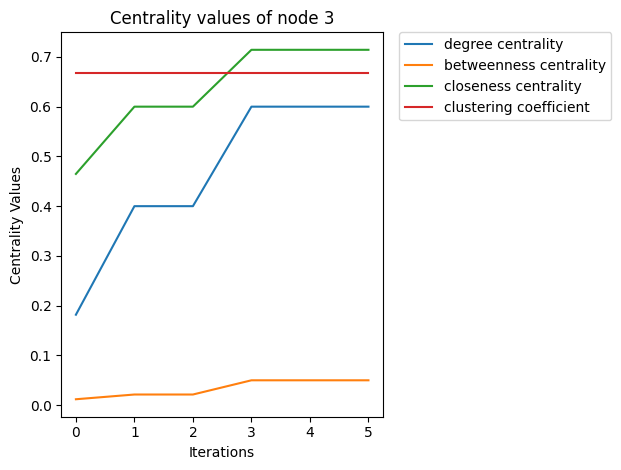

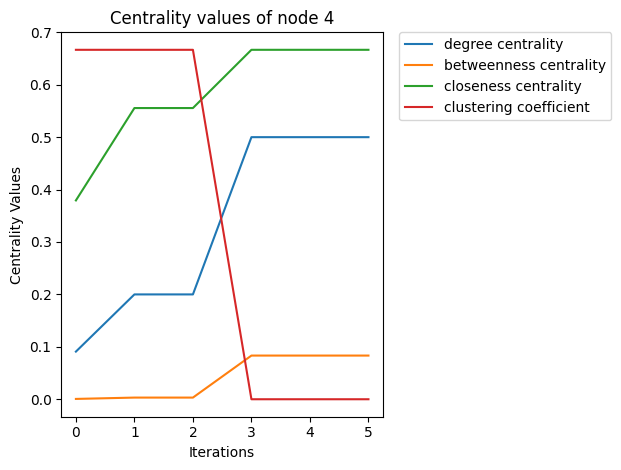

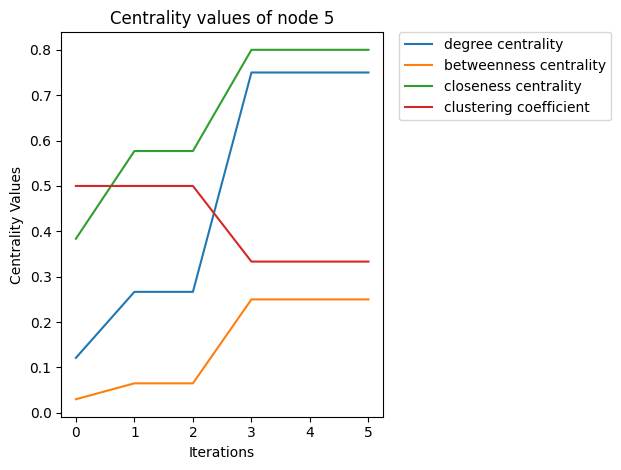

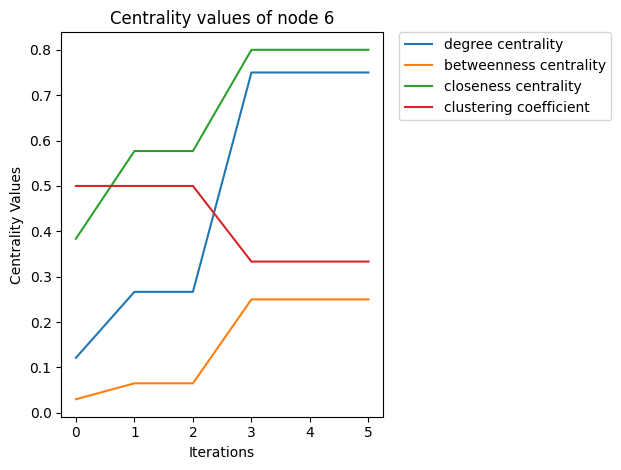

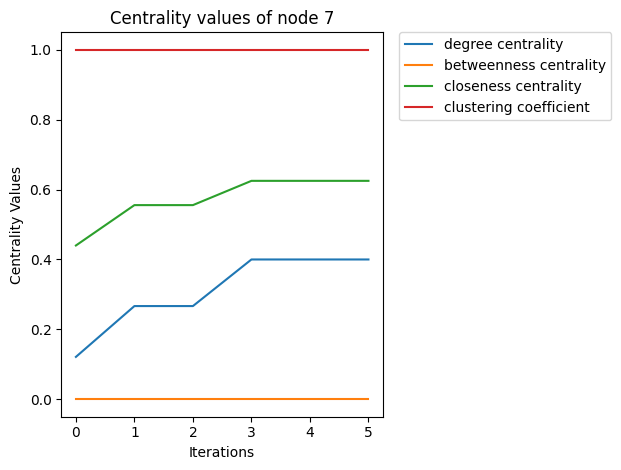

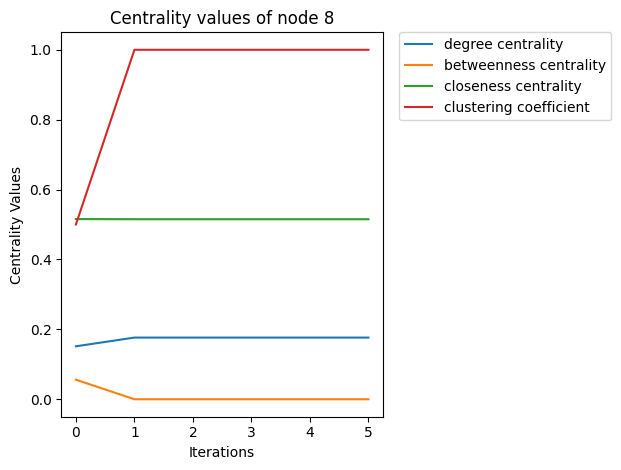

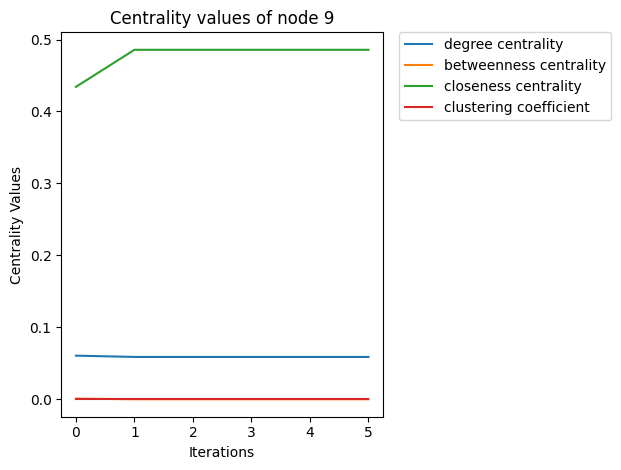

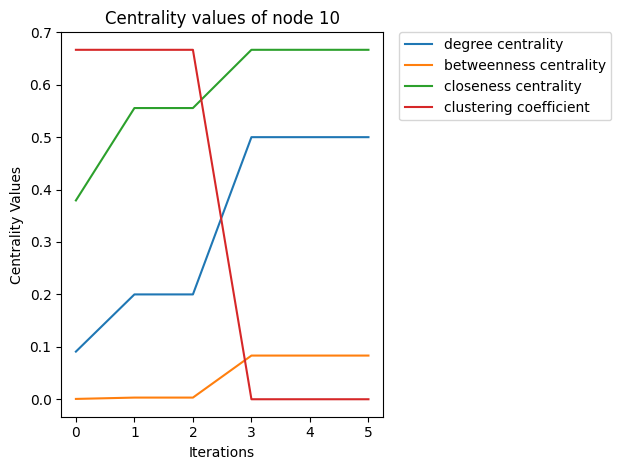

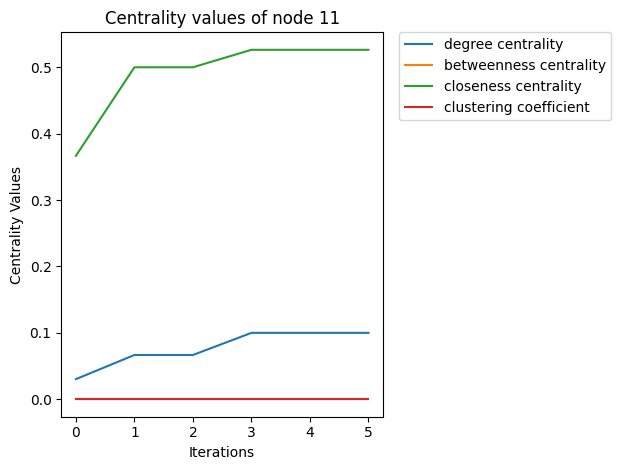

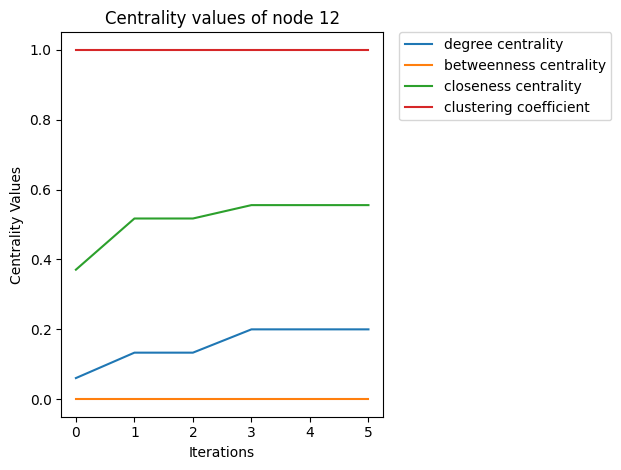

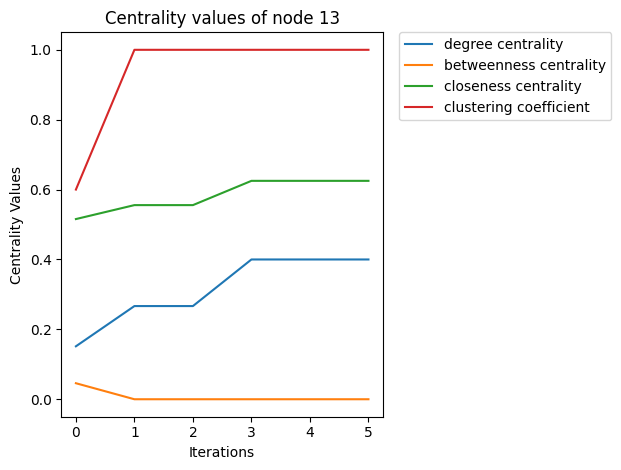

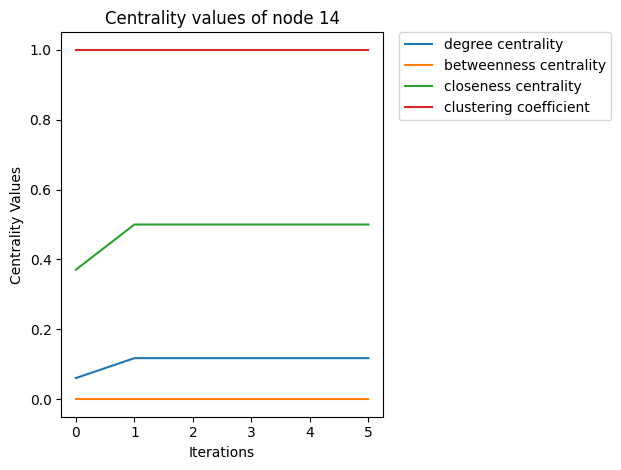

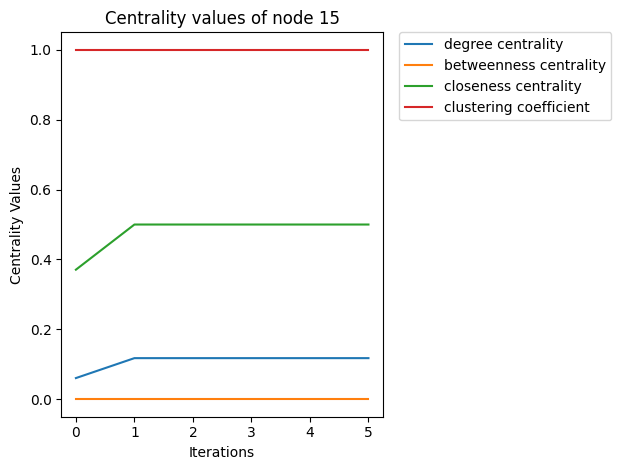

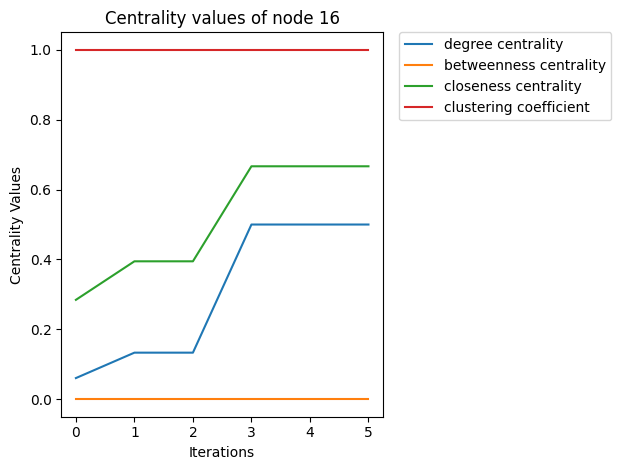

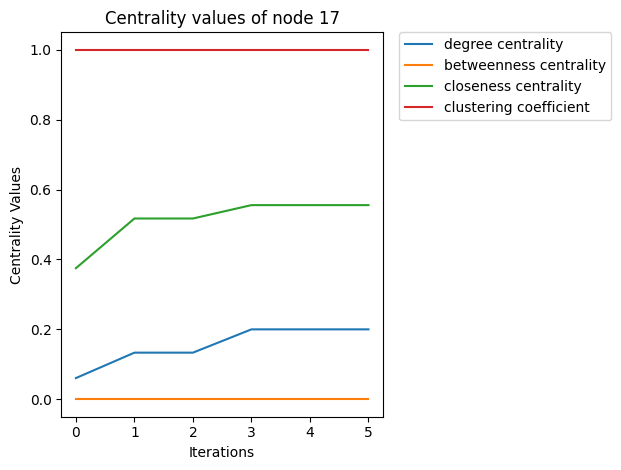

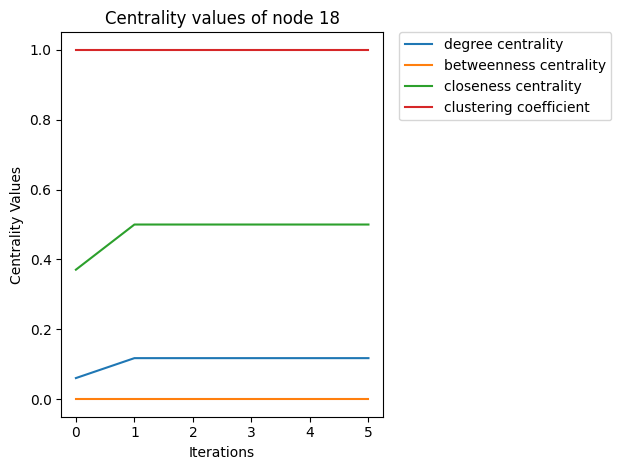

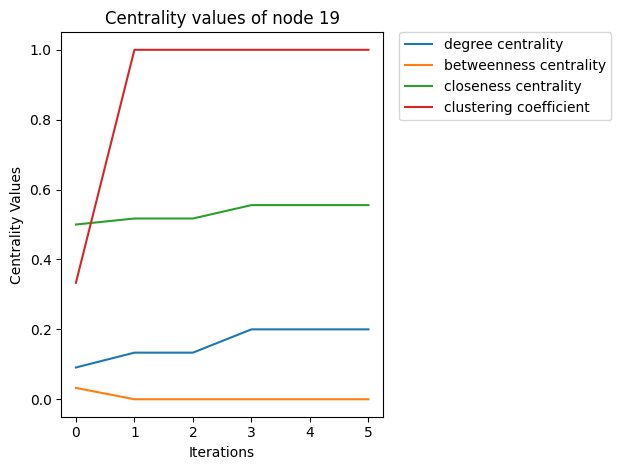

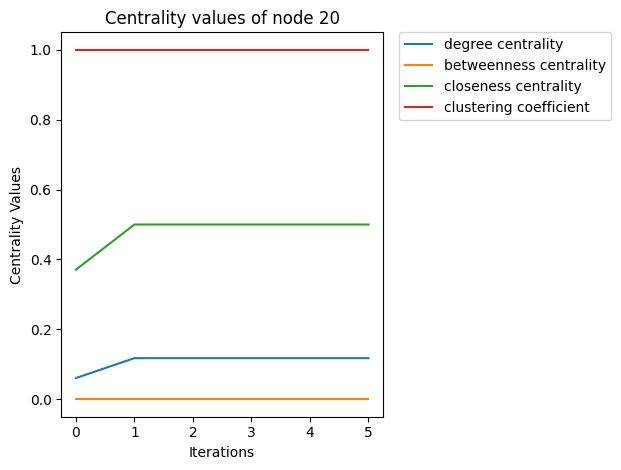

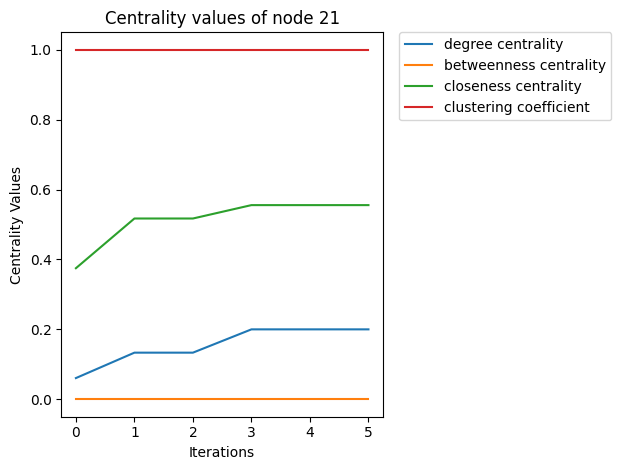

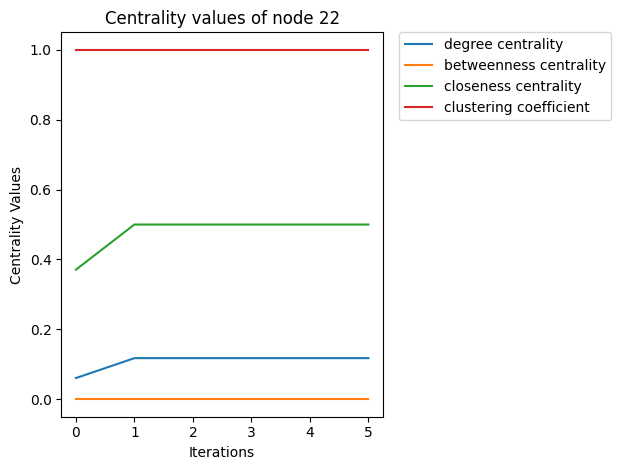

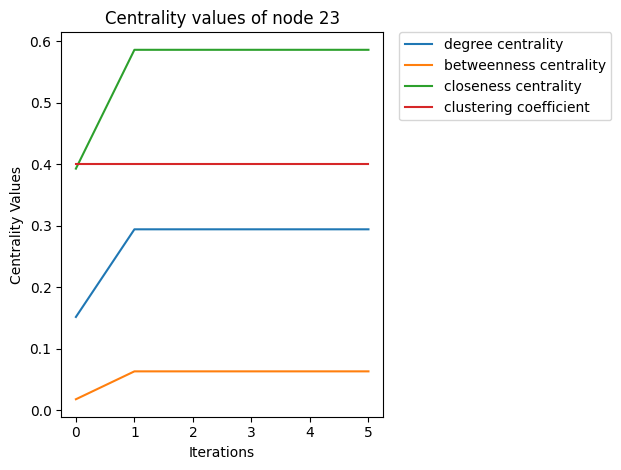

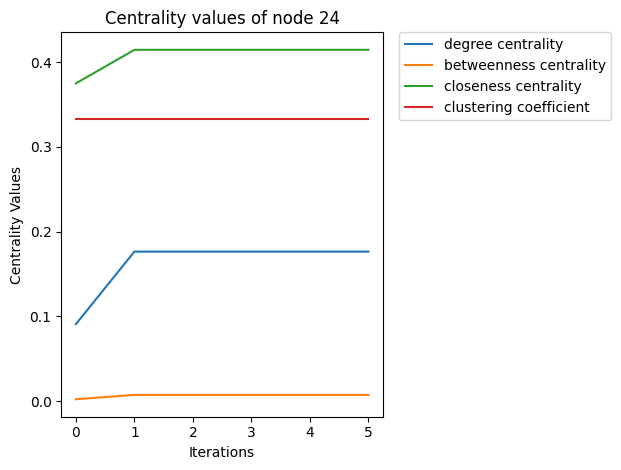

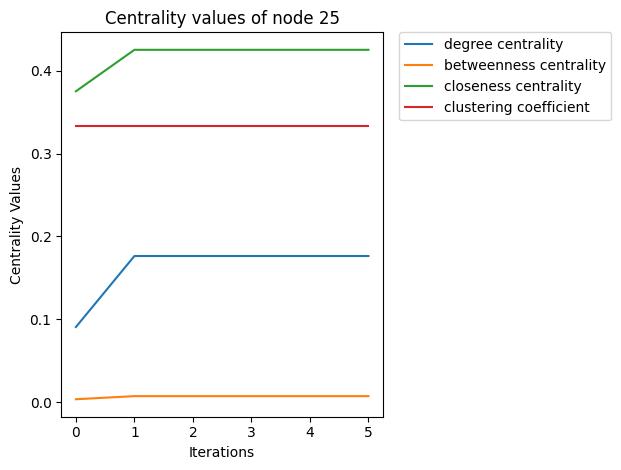

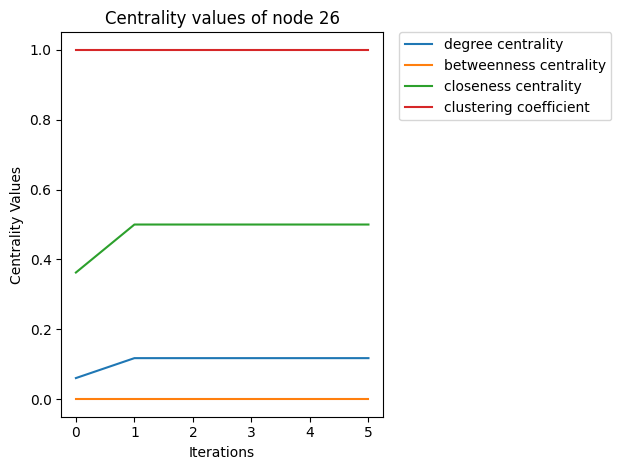

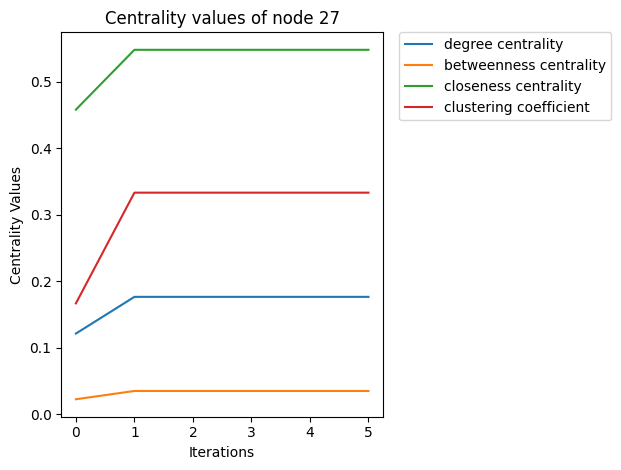

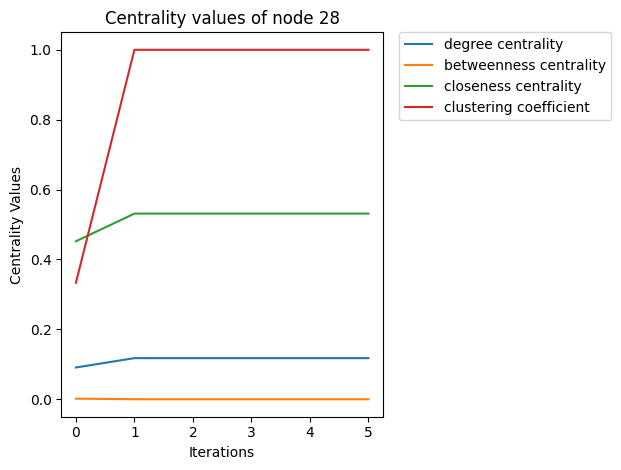

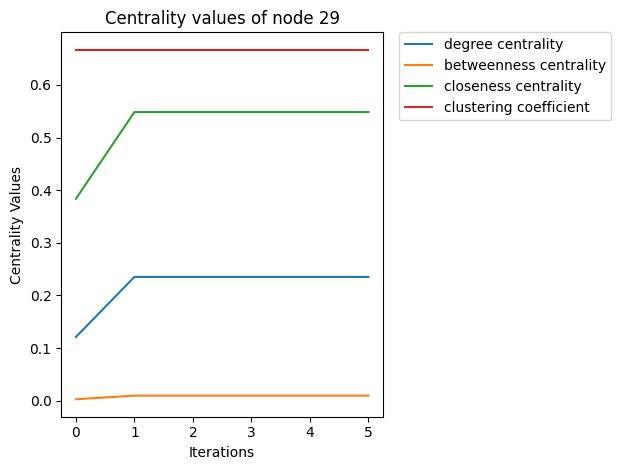

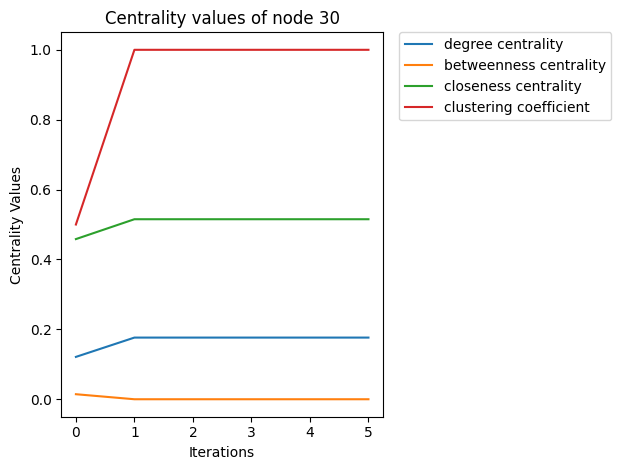

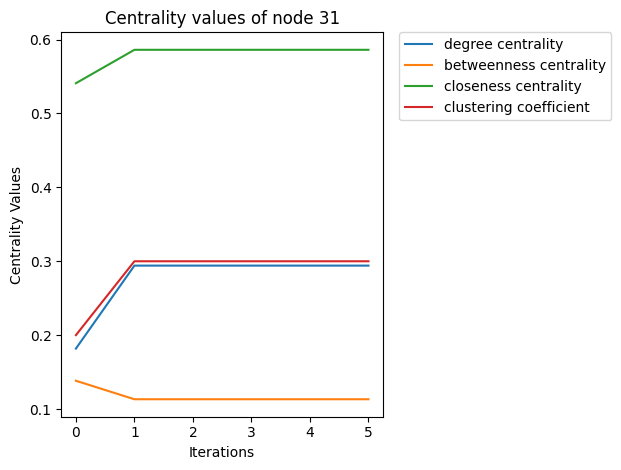

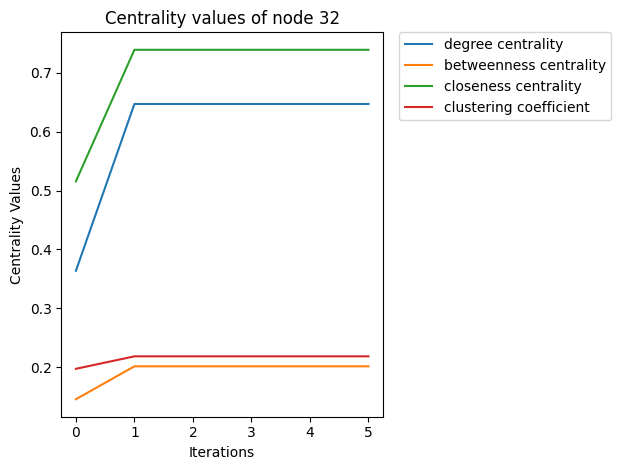

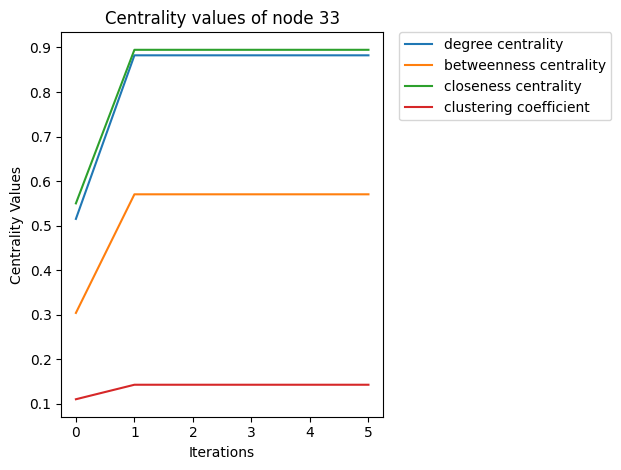

In [81]:
cluster_count=len(communities)
print(f'{cluster_count} clusters were identified\n')

from matplotlib.ticker import MaxNLocator

x_axis = list(range(0, iterations+1,1))
for i in range(node_count):
    degree_centrality_values = []
    betweenness_centrality_values = []
    closeness_centrality_values = []
    clustering_coefficient_values = []

    for j in degree_centrality.keys():
        degree_centrality_values.append(degree_centrality[j][i])
        betweenness_centrality_values.append(betweenness_centrality[j][i])
        closeness_centrality_values.append(closeness_centrality[j][i])
        clustering_coefficient_values.append(clustering_coefficient[j][i])

#Specifications for plotting
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.plot(x_axis, degree_centrality_values, label='degree centrality')
    plt.plot(x_axis, betweenness_centrality_values, label='betweenness centrality')
    plt.plot(x_axis, closeness_centrality_values, label='closeness centrality')
    plt.plot(x_axis, clustering_coefficient_values, label='clustering coefficient')
    plt.title(f'Centrality values of node {i}')
    plt.xlabel('Iterations')
    plt.ylabel('Centrality Values')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tight_layout()
    plt.show()

Node 0 and 33 remain consistent across splits.

**Betweenness centrality** changes the most across splits.
Nodes that act as bridges between groups lose betweenness when the graph is partitioned and those connections disappear.

**Closeness centrality** often increases for nodes that end up in small, tightly connected communities
since distances between nodes decrease.

**Degree centrality** is mostly stable, because it depends only on immediate neighbors
and does not change much across the splits.

**Clustering coefficient** often increases as clustering progresses, for nodes that become part of tightly connected communities, while it may decrease or remain stable for nodes that lose connections or remain peripheral.

Community structure has a strong impact on how we interpret node importance.
A node may look central in the full graph but lose influence after separation,
or may become more central inside its own smaller, cohesive subcommunity.